<a href="https://colab.research.google.com/github/Hongyongmin/Edwith-Pytorch/blob/main/9_1_ReLU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random
import matplotlib.pyplot as plt

In [ ]:
device = 'cuba' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
mnist_train = dsets.MNIST(root = 'MNIST_data/',
                          train=True,
                          transform = transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform = transforms.ToTensor(),
                         download=True)

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          drop_last = True)

In [ ]:
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [ ]:
torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[-0.1953, -0.4404,  0.0139,  ...,  0.7510,  1.5190,  0.9637],
        [ 0.4146, -1.0660, -0.9969,  ..., -0.3259, -0.2695, -1.3316],
        [ 0.2600, -1.1821,  0.0065,  ...,  1.0648, -1.2251,  0.9841],
        ...,
        [ 0.0279, -1.7242, -1.1723,  ...,  1.3651, -0.0689, -0.7931],
        [ 0.0952,  0.1939,  0.1636,  ..., -1.0489,  0.6224, -1.7181],
        [ 2.6504,  0.6297, -1.6571,  ..., -0.0781, -1.1398, -0.8711]],
       requires_grad=True)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(linear.parameters(), lr = learning_rate)

In [ ]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
  avg_cost = 0

  for X, Y in data_loader:
    X= X.view(-1, 28*28).to(device)
    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis = linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('Epoch', '%04d' %(epoch+1), 'cost= ', '{:.9f}'.format(avg_cost))

print('Learning finished')

EpochL 0001 cost=  1.567883492
EpochL 0002 cost=  1.038770199
EpochL 0003 cost=  0.829164267
EpochL 0004 cost=  0.710887372
EpochL 0005 cost=  0.633562028
EpochL 0006 cost=  0.577801466
EpochL 0007 cost=  0.535825014
EpochL 0008 cost=  0.502198219
EpochL 0009 cost=  0.475970000
EpochL 0010 cost=  0.453824073
EpochL 0011 cost=  0.435528606
EpochL 0012 cost=  0.419998407
EpochL 0013 cost=  0.406546563
EpochL 0014 cost=  0.394576788
EpochL 0015 cost=  0.383894801
Learning finished


Accuracy: 0.890999972820282
Label:  9
Prediction:  9


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


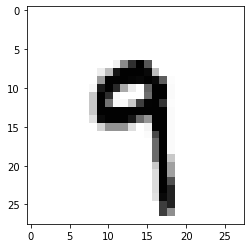

In [ ]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation = 'nearest')
    plt.show()

여기까지 softmax를 이용한것

In [ ]:
linear1 = torch.nn.Linear(784, 256, bias = True)
linear2 = torch.nn.Linear(256, 256, bias = True)
linear3 = torch.nn.Linear(256, 10, bias = True)
relu = torch.nn.ReLU()

In [ ]:
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

Parameter containing:
tensor([[-1.1538, -2.4732,  1.6699,  ..., -0.1459,  2.2752, -0.9736],
        [-0.9013,  0.1815, -0.3800,  ..., -1.6154, -0.2266,  0.5625],
        [ 0.8231,  0.9007,  1.0888,  ..., -0.5623,  0.3111, -0.9502],
        ...,
        [-0.5805, -0.3989,  0.5967,  ..., -0.1605, -0.0874, -0.9896],
        [ 1.8130,  0.0971, -1.2704,  ...,  0.2402, -0.1077, -0.0485],
        [-0.7582,  0.2293,  1.2683,  ..., -1.1334,  1.3830,  2.0613]],
       requires_grad=True)

In [ ]:
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
  avg_cost = 0

  for X, Y in data_loader:
    X=X.view(-1, 28*28).to(device)
    Y=Y.to(device)

    optimizer.zero_grad()
    hypothesis = model(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch
  print('Epoch: ' , '%04d' % (epoch +1), 'cost = ', '{:.9f}'.format(avg_cost))
print('Learning finished')

Epoch:  0001 cost =  148.658477783
Epoch:  0002 cost =  39.650173187
Epoch:  0003 cost =  24.687585831
Epoch:  0004 cost =  16.908552170
Epoch:  0005 cost =  12.394948006
Epoch:  0006 cost =  9.137862206
Epoch:  0007 cost =  6.767037868
Epoch:  0008 cost =  4.971987247
Epoch:  0009 cost =  3.823762178
Epoch:  0010 cost =  2.818024874
Epoch:  0011 cost =  2.122434378
Epoch:  0012 cost =  1.669105887
Epoch:  0013 cost =  1.190080404
Epoch:  0014 cost =  0.992511272
Epoch:  0015 cost =  0.793559253
Learning finished


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9488000273704529
Label:  3
Prediction:  3


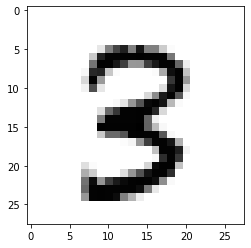

In [ ]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r+1].view(28, 28), cmap='Greys', interpolation = 'nearest')
    plt.show()